In [2]:

import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


[0.18054363 0.17488585 0.33334629]


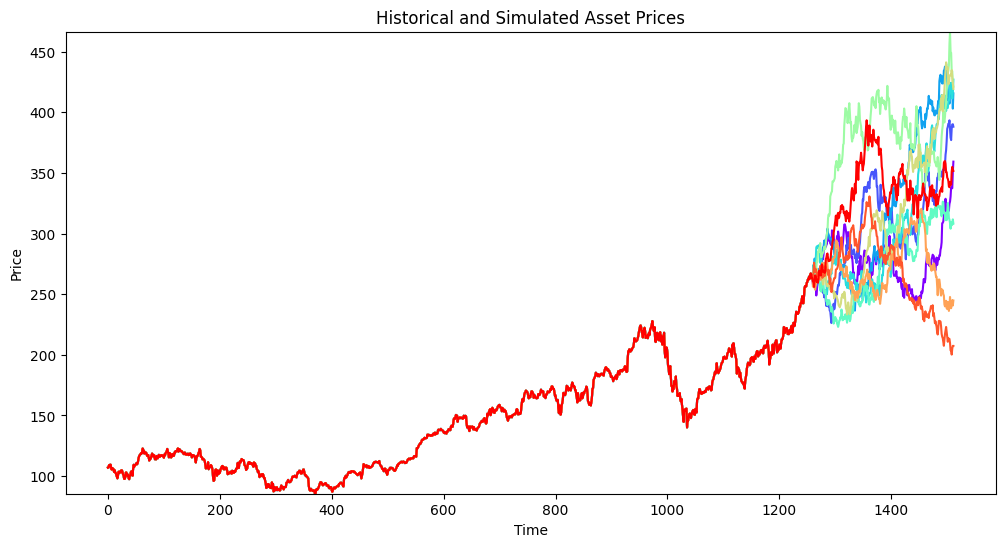

In [3]:
#np.random.seed(4518)  # Set seed for reproducibility

def Visualize(S):
    """
    Visualize multiple time series data.
    Each row of S represents a different series.
    """
    minS = np.min(S)
    maxS = np.max(S)
    noS = S.shape[0]  # Number of series
    cl = plt.cm.rainbow(np.linspace(0, 1, noS))  # Color map

    plt.figure(figsize=(12, 6))
    for i in range(noS):
        plt.plot(S[i, :], color=cl[i], label=f'Series {i+1}')
    plt.ylim([minS, maxS])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Historical and Simulated Asset Prices')
    #plt.legend()
    plt.show()

# Read data
AAA = pd.read_csv('AAA.csv', header=0)
dt = 1/252
AAAprices = AAA.iloc[:, 1:4].values.astype(float)  # Extract columns 2, 3, 4

n0 = AAAprices.shape[0]
AAAlogprices = np.log(AAAprices)
AAAlogreturns = AAAlogprices[1:n0, :] - AAAlogprices[0:n0-1, :]

# Estimate drift (v) and covariance matrix (Sigma)
v = np.mean(AAAlogreturns, axis=0) / dt
print(v)
Sigma = np.cov(AAAlogreturns.T) / dt

def SimMultiGBMexact(S0, v, Sigma, Deltat, T):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    m = int(T / Deltat)  # Number of periods
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)
    

    for j in range(1, m + 1):
        S[:, j] = S[:, j - 1] * np.exp(Z[j - 1, :])
    return S

# Simulation parameters
Nsim = 10
T = 1
dt = 1/252
m = int(T / dt)
S0 = AAAprices[-1, :]  # Last observed prices

# Initialize matrices to store simulated paths
S1 = np.zeros((Nsim, m + 1))
S2 = np.zeros((Nsim, m + 1))
S3 = np.zeros((Nsim, m + 1))

#np.random.seed(4518)  # Set seed for reproducibility

# Simulate paths
for i in range(Nsim):
    S = SimMultiGBMexact(S0, v, Sigma, dt, T)
    S1[i, :] = S[0, :]
    S2[i, :] = S[1, :]
    S3[i, :] = S[2, :]

# Combine historical and simulated data for the first asset
HistS1 = np.tile(AAAprices[:, 0], (Nsim, 1))
wholeS1 = np.hstack((HistS1, S1))

# Visualize the paths
Visualize(wholeS1)


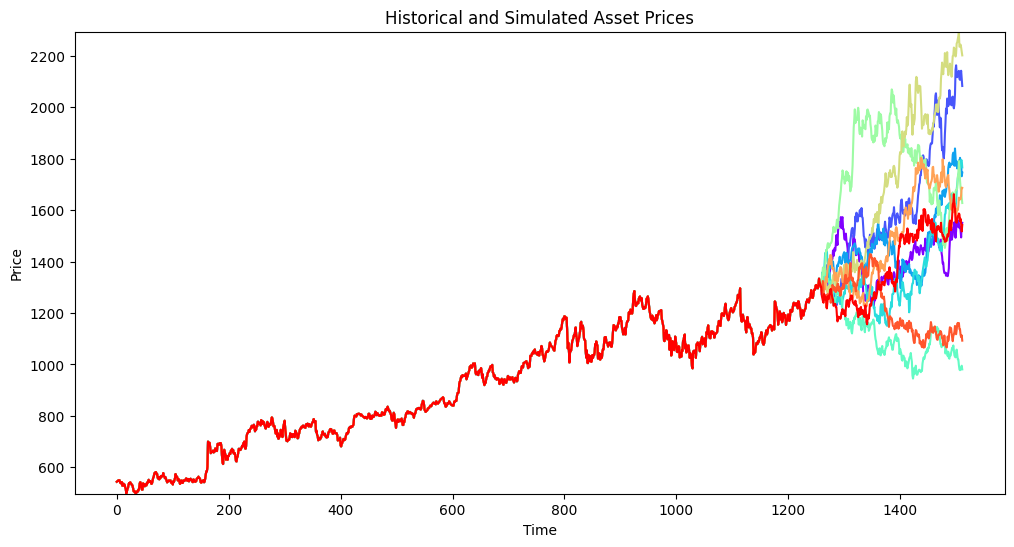

In [4]:
HistS2 = np.tile(AAAprices[:, 1], (Nsim, 1))
wholeS2 = np.hstack((HistS2, S2))
Visualize(wholeS2)

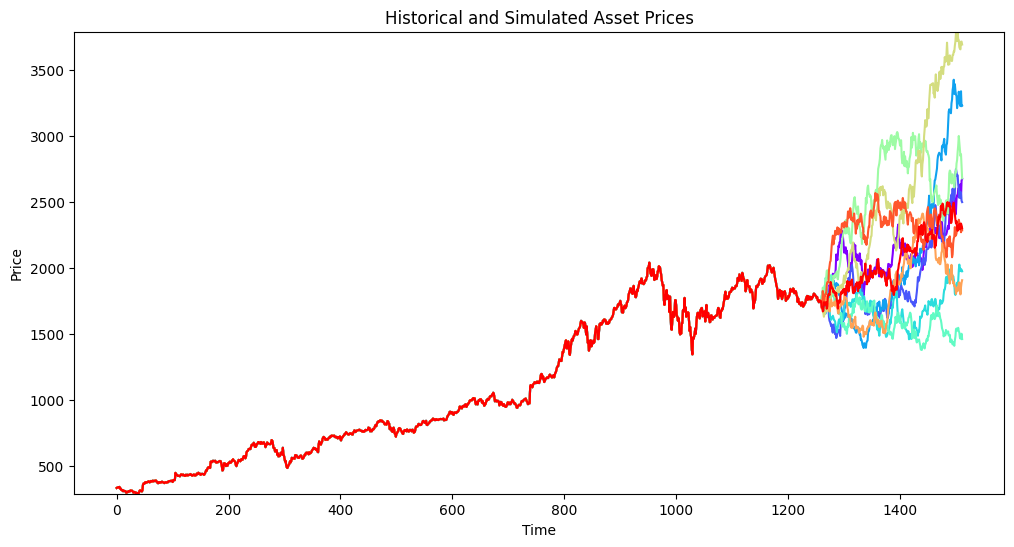

In [5]:
HistS3 = np.tile(AAAprices[:, 2], (Nsim, 1))
wholeS3 = np.hstack((HistS3, S3))
Visualize(wholeS3)

In [6]:
v

array([0.18054363, 0.17488585, 0.33334629])

In [7]:

start_date = datetime.datetime.strptime('2022-09-30', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-8-1', '%Y-%m-%d')  #1 aug to 28 October simulation
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data = yf.download(BMW_ticker, start=start_date, end=end_date)
mbg_data = yf.download(MBG_ticker, start=start_date, end=end_date)
p_data = yf.download(P_ticket, start=start_date, end=end_date)
# Display the data
#print(bmw_data.head(2))
#print(mbg_data.head(2))
print(p_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                       P911.DE    P911.DE    P911.DE    P911.DE   
Date                                                                    
2022-09-30 00:00:00+00:00  79.233162  82.500000  83.500000  82.500000   
2022-10-03 00:00:00+00:00  78.560883  81.800003  82.720001  81.000000   
2022-10-04 00:00:00+00:00  84.015968  87.480003  87.480003  82.000000   
2022-10-05 00:00:00+00:00  84.438538  87.919998  89.639999  86.519997   
2022-10-06 00:00:00+00:00  87.127663  90.720001  93.699997  89.339996   

Price                           Open   Volume  
Ticker                       P911.DE  P911.DE  
Date                                           
2022-09-30 00:00:00+00:00  82.900002  5079137  
2022-10-03 00:00:00+00:00  82.500000  2403446  
2022-10-04 00:00:00+00:00  82.699997  1599630  
2022-10-05 00:00:00+00:00  87.099998  1321304  
2022-10-06 00:00:00+00:00  89.699997  2217065  


In [8]:
len(p_data)

469

In [9]:
# Check for missing values
print(mbg_data.isnull().sum())
print(bmw_data.isnull().sum())
print(p_data.isnull().sum())

Price      Ticker
Adj Close  MBG.DE    0
Close      MBG.DE    0
High       MBG.DE    0
Low        MBG.DE    0
Open       MBG.DE    0
Volume     MBG.DE    0
dtype: int64
Price      Ticker
Adj Close  BMW.DE    0
Close      BMW.DE    0
High       BMW.DE    0
Low        BMW.DE    0
Open       BMW.DE    0
Volume     BMW.DE    0
dtype: int64
Price      Ticker 
Adj Close  P911.DE    0
Close      P911.DE    0
High       P911.DE    0
Low        P911.DE    0
Open       P911.DE    0
Volume     P911.DE    0
dtype: int64


In [10]:
bmw_data.columns

MultiIndex([('Adj Close', 'BMW.DE'),
            (    'Close', 'BMW.DE'),
            (     'High', 'BMW.DE'),
            (      'Low', 'BMW.DE'),
            (     'Open', 'BMW.DE'),
            (   'Volume', 'BMW.DE')],
           names=['Price', 'Ticker'])

In [11]:
BMP = pd.concat([bmw_data['Close'], mbg_data['Close'], p_data['Close']], axis=1)

In [12]:
bmp_prices = pd.concat([bmw_data['Close', 'BMW.DE'], mbg_data['Close', 'MBG.DE'], p_data['Close', 'P911.DE']], axis=1)
bmp_prices.columns = ['BMW', 'MBG', 'Porsche']
bmp_prices

,BMW,MBG,Porsche
Date,,,
2022-09-30 00:00:00+00:00,69.989998,52.349998,82.500000
2022-10-03 00:00:00+00:00,70.730003,52.990002,81.800003
2022-10-04 00:00:00+00:00,72.849998,55.000000,87.480003
2022-10-05 00:00:00+00:00,71.470001,53.009998,87.919998
2022-10-06 00:00:00+00:00,71.970001,53.840000,90.720001
...,...,...,...
2024-07-25 00:00:00+00:00,88.199997,62.959999,69.000000
2024-07-26 00:00:00+00:00,87.559998,63.020000,69.860001
2024-07-29 00:00:00+00:00,86.580002,61.900002,69.519997


In [13]:
# Read data
dt = 1/252
bmp_prices = BMP.values.astype(float)  # Extract columns 

n0 = bmp_prices.shape[0]
bmplogprices = np.log(bmp_prices)
bmplogreturns = bmplogprices[1:n0, :] - bmplogprices[0:n0-1, :]
bmplogreturns

array([[ 0.01051751,  0.01215134, -0.00852101],
       [ 0.02953265,  0.03722994,  0.06713295],
       [-0.01912471, -0.03685264,  0.00501706],
       ...,
       [-0.01125538, -0.01793194, -0.00487882],
       [ 0.00207685, -0.00437142, -0.00115133],
       [-0.01089363, -0.0076554 ,  0.0045977 ]])

In [14]:
d0 = datetime.date(2024, 8, 1)
d1 = datetime.date(2024, 12, 4)
#m = (d1 - d0).days
#print(m)
m = np.busday_count(d0, d1)
print(m)

89


In [15]:
(datetime.date(2024, 9, 30)- datetime.date(2023, 9, 30)).days

366

In [16]:
v

array([0.18054363, 0.17488585, 0.33334629])

In [17]:
def Visualize(S, S_real, barrier_levels, early_redemption_level):
    """
    Visualize multiple time series data.
    Each row of S represents a different series.
    """
    minS = np.min(S)
    maxS = np.max(S)
    noS = S.shape[0]  # Number of series
    cl = plt.cm.rainbow(np.linspace(0, 1, noS))  # Color map

    plt.figure(figsize=(12, 6))
    for i in range(noS):
        plt.plot(S[i, :], color=cl[i], label=f'Series {i+1}')
        
    plt.ylim([minS, maxS])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Historical and Simulated Asset Prices')
    plt.plot(S_real.values, color='black', label='Real')
    #plot lines for barrier levels and early redemption level
    plt.axhline(y=barrier_levels, color='r', linestyle='--', label='Barrier Level 1')
    plt.axhline(y=early_redemption_level, color='g', linestyle='--', label='Early Redemption Level')

    #plt.legend()
    plt.show()

In [18]:
def black_scholes_multi(S0, v, Sigma, Delta_t, T):

    m = int(T / Delta_t)  # no.of periods
    p = len(S0)
    S = np.zeros((p, m+1))
    S[:, 0] = S0

    Z = multivariate_normal.rvs(mean=v * Delta_t, cov=Sigma * Delta_t, size=m)

    for t in range(1, m+1):
        S[:, t] = np.exp(np.log(S[:, t-1]) + Z[t-1])

    return S

[*********************100%***********************]  1 of 1 completed

(1000, 29)


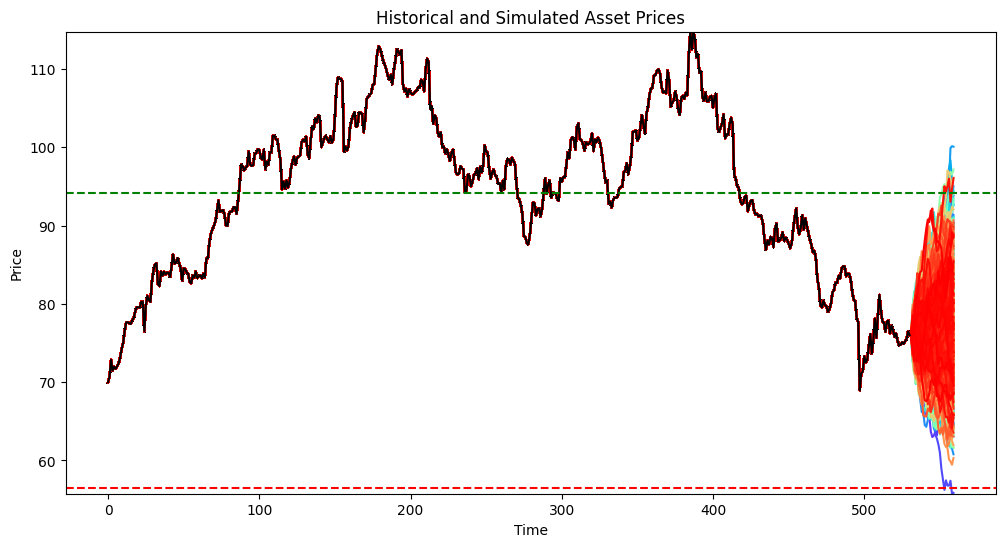

In [58]:

barrier_levels = [56.520, 39.516, 58.896]
early_redemption_level = [94.2, 65.86, 98.16]

#bmplogreturns = returns.to_numpy()
# set the numpy seed
#np.random.seed(4518)
# Estimate drift (v) and covariance matrix (Sigma)
bmplogreturns = bmplogprices[1:n0, :] - bmplogprices[0:n0-1, :]
r = 0.03254654
sigma = np.var(bmplogreturns, axis=0) / dt
v = np.array([r,r,r]) - 0.5 * (sigma**2)/2
#v = np.mean(bmplogreturns, axis=0) / dt
Sigma = np.cov(bmplogreturns.T) / dt
#print(sigma)


def SimMultiGBMexact(S0, v, Sigma, Deltat):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m + 1):
        S[:, j] = np.exp(np.log(S[:, j - 1])+Z[j - 1, :])
    return S

def SimGBM1shootpmhn(S0,v,sigma,Deltat,h):
    p = len(S0) 
    S = np.zeros((p, m + 1))
    S[:, 0] = S0
    Splush = np.zeros((p, m + 1))
    Splush[:, 0] = S0+h
    Sminush = np.zeros((p, m + 1))
    Sminush[:, 0] = S0-h
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m+1):
        Splush[:, j] = Splush[:, j - 1] * np.exp(Z[j - 1, :])
        Sminush[:, j] = Sminush[:, j - 1] * np.exp(Z[j - 1, :])
        S[:, j] = np.exp(np.log(S[:, j - 1])+Z[j - 1, :])

    return S, Splush, Sminush






def SimMultiGBMexactAV(S0, v, Sigma, Deltat):
    """
    Simulate paths of a multivariate Geometric Brownian Motion (GBM).

    Parameters:
    - S0: Initial asset prices (array)
    - v: Drift vector (array)
    - Sigma: Covariance matrix (2D array)
    - Deltat: Time increment
    - T: Total time

    Returns:
    - S: Simulated asset prices (2D array)
    """
    p = len(S0)          # Number of assets
    S = np.zeros((p, m + 1))
    Stilde = np.zeros((p, m + 1))
    S[:, 0] = S0
    Stilde[:, 0] = S0
    Z = np.random.multivariate_normal(v * Deltat, Sigma * Deltat, m)

    for j in range(1, m + 1):
        S[:, j] = S[:, j - 1] * np.exp(Z[j - 1, :])
        Stilde[:, j] = Stilde[:, j - 1] * np.exp(-Z[j - 1, :])
    

    return S, Stilde



# Simulation parameters
Nsim = 1000
#T = 1.25
dt = 1/252
S0 = bmp_prices[-1, :]  # Last observed prices

# Initialize matrices to store simulated paths
S1 = np.zeros((Nsim, m + 1))
S2 = np.zeros((Nsim, m + 1))
S3 = np.zeros((Nsim, m + 1))

#np.random.seed(4518)  # Set seed for reproducibility
AV=False
if not AV:
# Simulate paths
    for i in range(Nsim):
        S = SimMultiGBMexact(S0, v, Sigma, dt)
        S1[i, :] = S[0, :]
        S2[i, :] = S[1, :]
        S3[i, :] = S[2, :]

else:

    S1 = np.zeros((Nsim*2, m + 1))
    S2 = np.zeros((Nsim*2, m + 1))
    S3 = np.zeros((Nsim*2, m + 1))

    for i in range(0,Nsim*2,2):
        S, Stilde = SimMultiGBMexactAV(S0, v, Sigma, dt)
        S1[i, :] = S[0, :]
        S1[i+1, :] = Stilde[0, :]
        S2[i, :] = S[1, :]
        S2[i+1, :] = Stilde[1, :]
        S3[i, :] = S[2, :]
        S3[i+1, :] = Stilde[2, :]
    
print(S3.shape)
# Combine historical and simulated data for the first asset
k=2 if AV else 1
HistS1 = np.tile(bmp_prices[:, 0], (Nsim*k, 1))
wholeS1 = np.hstack((HistS1, S1))

#Plot real data of BMW from 2022-09-30 to 2024-10-28
start_date_real= datetime.datetime.strptime('2022-09-30', '%Y-%m-%d')
end_date_real = datetime.datetime.strptime('2024-10-28', '%Y-%m-%d')  #1 aug to 31 October
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'

# Download historical data for BMW
bmw_data_real = yf.download(BMW_ticker, start=start_date_real, end=end_date_real)
# Visualize the paths
Visualize(wholeS1, bmw_data_real['Close'], barrier_levels[0], early_redemption_level[0])


In [20]:
S0

array([85.81999969, 61.15999985, 69.76000214])

[*********************100%***********************]  1 of 1 completed


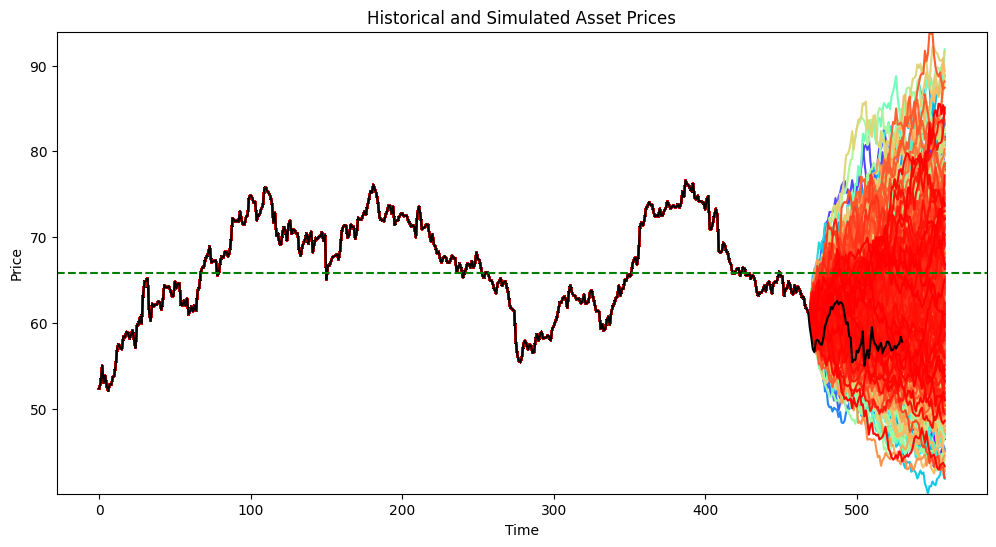

In [21]:
# Combine historical and simulated data for the first asset
HistS2 = np.tile(bmp_prices[:, 1], (Nsim*k, 1))
wholeS2 = np.hstack((HistS2, S2))

# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
MBG_ticker = 'MBG.DE'

# Download historical data for BMW
mbg_data_real = yf.download(MBG_ticker, start=start_date_real, end=end_date_real)


# Visualize the paths
Visualize(wholeS2, mbg_data_real['Close'], barrier_levels[1], early_redemption_level[1])

[*********************100%***********************]  1 of 1 completed


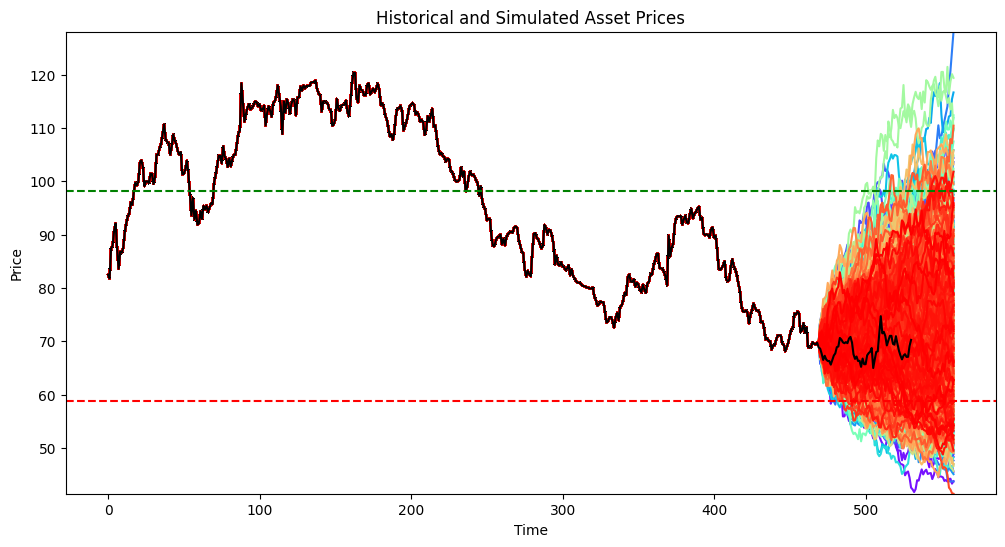

In [22]:
# Combine historical and simulated data for the first asset
HistS3 = np.tile(bmp_prices[:, 2], (Nsim*k, 1))
wholeS3 = np.hstack((HistS3, S3))

#get real data for Porsche
P_ticket = 'P911.DE'
p_data_real = yf.download(P_ticket, start=start_date_real, end=end_date_real)

# Visualize the paths
Visualize(wholeS3, p_data_real['Close'], barrier_levels[2], early_redemption_level[2])

In [23]:
print('length of history:', len(list(BMP.index.values)))
print('length of simulated:',len(S1[0]))  #first value is S0, which is final day of history

length of history: 469
length of simulated: 90


In [24]:
#stack S1, S2, S3 as a 3d array
all_S = np.stack((S1, S2, S3), axis=0)
all_S = np.transpose(all_S,(1,0,2))
all_S.shape

(1000, 3, 90)

In [25]:
#Count number of times porsche hits barrier level
count = 0
for i in range(len(all_S)):
    if np.any(all_S[i][2] <= barrier_levels[2]):
        count += 1
count

278

In [26]:
S0

array([85.81999969, 61.15999985, 69.76000214])

In [49]:
start_date = datetime.datetime.strptime('2024-10-25', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-10-29', '%Y-%m-%d')
# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data_check = yf.download(BMW_ticker, start=start_date, end=end_date)
mbg_data_check  = yf.download(MBG_ticker, start=start_date, end=end_date)
p_data_check  = yf.download(P_ticket, start=start_date, end=end_date)
# Display the data
print(bmw_data_check.head())
print(mbg_data_check.head())
print(p_data_check.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                        BMW.DE     BMW.DE     BMW.DE     BMW.DE   
Date                                                                    
2024-10-25 00:00:00+00:00  76.000000  76.000000  76.739998  75.360001   
2024-10-28 00:00:00+00:00  75.519997  75.519997  77.000000  74.480003   

Price                           Open  Volume  
Ticker                        BMW.DE  BMW.DE  
Date                                          
2024-10-25 00:00:00+00:00  75.699997  729592  
2024-10-28 00:00:00+00:00  76.699997  713271  
Price                      Adj Close      Close       High        Low  \
Ticker                        MBG.DE     MBG.DE     MBG.DE     MBG.DE   
Date                                                                    
2024-10-25 00:00:00+00:00  57.790001  57.790001  58.080002  56.099998   
2024-10-28 00:00:00+00:00  57.430000  57.430000  58.419998  56.740002   

Price                           O

In [28]:
early_redemption_dates = [datetime.datetime.strptime('2024-03-5', '%Y-%m-%d'), datetime.datetime.strptime('2024-06-5', '%Y-%m-%d'), datetime.datetime.strptime('2024-09-4', '%Y-%m-%d')]
coupon_payments = [datetime.datetime.strptime('2023-12-8', '%Y-%m-%d'), datetime.datetime.strptime('2024-03-8', '%Y-%m-%d'), datetime.datetime.strptime('2024-06-10', '%Y-%m-%d'), datetime.datetime.strptime('2024-09-9', '%Y-%m-%d'), datetime.datetime.strptime('2024-12-9', '%Y-%m-%d')]  
barrier_levels = [56.520, 39.516, 58.896]
early_redemption_level = [94.2, 65.86, 98.16]

def date_range_list(start_date, end_date):
    # Return list of datetime.date objects (inclusive) between start_date and end_date (inclusive).
    date_list = []
    curr_date = start_date
    while curr_date <= end_date:
        if curr_date.weekday() < 5:
            date_list.append(curr_date)
        curr_date += datetime.timedelta(days=1)
    return date_list
start_date = datetime.datetime.strptime('2024-08-1', '%Y-%m-%d')
end_date = datetime.datetime.strptime('2024-12-4', '%Y-%m-%d')
date_list = date_range_list(start_date, end_date)
print(date_list[-2:])
print(date_list[0])
print(len(date_list))

for i in range(len(date_list)):
    if date_list[i] in early_redemption_dates:
        print(date_list[i])

[datetime.datetime(2024, 12, 3, 0, 0), datetime.datetime(2024, 12, 4, 0, 0)]
2024-08-01 00:00:00
90
2024-09-04 00:00:00


In [50]:
#28 june simulation start, 2024-6-28
def calculate_payoff(
    all_S,
    early_redemption_dates = early_redemption_dates,
    S_barrier_levels=barrier_levels,
    D = 1000,
    c = 0.1025/4,
    n_total_coupons = 2,
    early_coupons = 1,
    conversion_ratio=[10.6157, 15.1837, 10.1874]
    ):
    
    case = False
    cases = []
    Nsim = all_S.shape[0]
    payoffs = []
    for sim in range(Nsim):
        S = all_S[sim]
        payoff = 0
        case = None
        for i, date in enumerate(date_list):  #early redemption
            if date in early_redemption_dates:
                #print(date)
            
                #print(f'price of stock {j} at {date} :', S[j,i])
                if np.all(S[:,i] >= early_redemption_level):
                    payoff = D * (1 + c * early_coupons)
                    case = 1
                    #print(f'Stock breached early redemption level at {date} at price {S[:,i]}')    
                    break
        if case == 1:
            payoffs.append(payoff)
            cases.append(case)
            #print(payoff)
            continue
       
        
        
        # Check if any Reference Share has breached the barrier during the lifetime
        barrier_breached = False
        breached_share = None
        for i in range(3):
            if np.any(S[i, :] <= S_barrier_levels[i]):
                barrier_breached = True
                breached_share = i
                
                break         
        
        if not barrier_breached or np.all(S[:, -1] >= S0):
            #print(len(S[:,-1]))
            cases.append(2)
            payoff = D * (1 + c * n_total_coupons)
        
        elif barrier_breached and not np.all(S[:, -1] >= S0):
            #worst performing share is share with biggest percentage drop from initial price
            worst_performing_share = np.argmin((S[:, -1]-S0) / S0)
            #print((S0 - S[:, -1]) / S0)
            ratio = conversion_ratio[worst_performing_share]
            payoff =  ratio * S[worst_performing_share, -1] * (1 + c * n_total_coupons)
            cases.append(3)
            #print('worst performing share',worst_performing_share,S[worst_performing_share, -1])
        
        payoffs.append(payoff)

    return payoffs, cases

    

In [55]:
start_date_backtest = datetime.date(2024,8,1)
end_date_backtest = datetime.date(2024,10,28)
#backtest_dates = date_range_list(start_date_backtest, end_date_backtest)
#backtest_dates1 = pd.bdate_range(start=start_date_backtest, end= end_date_backtest)
#assert len(backtest_dates) == len(backtest_dates1)

history_start = datetime.date(2022,9,30)
history_end = datetime.date(2024,10,28)


# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data = yf.download(BMW_ticker, start=history_start, end=history_end)
mbg_data = yf.download(MBG_ticker, start=history_start, end=history_end)
p_data = yf.download(P_ticket, start=history_start, end=history_end)
history_dates = [ i.date()for i in p_data.index]

BMP = pd.concat([bmw_data['Close'], mbg_data['Close'], p_data['Close']], axis=1)
dt = 1/252
bmp_prices = BMP.values.astype(float)  # Extract columns 

n0 = bmp_prices.shape[0]
bmplogprices = np.log(bmp_prices)
bmplogreturns = bmplogprices[1:n0, :] - bmplogprices[0:n0-1, :]
#print(bmplogreturns.shape)
#start_to_sim = np.busday_count(history_start, start_date_backtest)
#print(start_to_sim)

# get list of subset of history dates where the date is greater than or equal to start_date_backtest and less than or equal to end_date_backtest
backtest_dates = [i for i in history_dates if i >= start_date_backtest and i <= end_date_backtest]
#print(len(backtest_dates),backtest_dates[0], backtest_dates[-1])

start_to_sim_dates = [i for i in history_dates if i >= history_start and i < start_date_backtest]
#print(start_to_sim_dates[0], start_to_sim_dates[-1])

start_to_sim = len(start_to_sim_dates)


Nsim = 10000

early_redemption_dates = [datetime.date(2024,3,5), datetime.date(2024,6,5), datetime.date(2024,9,4)]
coupon_payments = [datetime.date(2023,12,8), datetime.date(2024,3,8), datetime.date(2024,6,10), datetime.date(2024,9,9), datetime.date(2024,12,9)]  
barrier_levels = [56.520, 39.516, 58.896]
early_redemption_level = [94.2, 65.86, 98.16]

sim_end = datetime.date(2024,12,4)
sim_dates = [i for i in history_dates if i >= start_date_backtest and i <= end_date_backtest]
extra = date_range_list(end_date_backtest, sim_end)
sim_dates.extend(extra)
m = len(sim_dates)
#print('m',m)

AV=False

backtest = []
for i in range(len(backtest_dates)):
    
    bmplog_window = bmplogreturns[:start_to_sim+i,:]
    r = 0.03254654
    var = np.var(bmplog_window, axis=0) / dt
    v = np.array([r,r,r]) - 0.5 * var
    Sigma = np.cov(bmplog_window.T) / dt

    # Initialize matrices to store simulated paths
    S1 = np.zeros((Nsim, m + 1))
    S2 = np.zeros((Nsim, m + 1))
    S3 = np.zeros((Nsim, m + 1))

    S0 = bmp_prices[start_to_sim+i, :]  # Last observed prices
    '''
    for j in range(Nsim):
        S = SimMultiGBMexact(S0, v, Sigma, dt)
        S1[j, :] = S[0, :]
        S2[j, :] = S[1, :]
        S3[j, :] = S[2, :]
    '''
    if not AV:
    # Simulate paths
        for j in range(Nsim):
            S = SimMultiGBMexact(S0, v, Sigma, dt)
            S1[j, :] = S[0, :]
            S2[j, :] = S[1, :]
            S3[j, :] = S[2, :]

    else:

        S1 = np.zeros((Nsim*2, m + 1))
        S2 = np.zeros((Nsim*2, m + 1))
        S3 = np.zeros((Nsim*2, m + 1))

        for j in range(0,Nsim*2,2):
            S, Stilde = SimMultiGBMexactAV(S0, v, Sigma, dt)
            S1[j, :] = S[0, :]
            S1[j+1, :] = Stilde[0, :]
            S2[j, :] = S[1, :]
            S2[j+1, :] = Stilde[1, :]
            S3[j, :] = S[2, :]
            S3[j+1, :] = Stilde[2, :]
    

    # Combine historical and simulated data for the first asset
    #k=2 if AV else 1
    
    all_S = np.stack((S1, S2, S3), axis=0)
    all_S = np.transpose(all_S,(1,0,2))
    
    current_date = backtest_dates[i]
    n_total_coupons = 2 if current_date <= coupon_payments[3] else 1
    early_coupons = 1 if current_date <= coupon_payments[3] else 0

    payoffs, cases = calculate_payoff(all_S, early_redemption_dates, barrier_levels, D=1000, c=0.1025/4, n_total_coupons=n_total_coupons, early_coupons=early_coupons)
    SimNotes = np.exp(-r*m/252)*np.array(payoffs)
    m-=1
    backtest.append(np.mean(SimNotes))

    
len(backtest)   
#backtest 
    
    
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


62

In [43]:
print(backtest)

[np.float64(909.8469813427133), np.float64(906.7367386381383), np.float64(891.6253993823746), np.float64(875.2266779692043), np.float64(890.1267433263421), np.float64(880.4018472827584), np.float64(877.1606857749147), np.float64(877.65037457151), np.float64(868.1813676285088), np.float64(883.707148946233), np.float64(900.5765460833205), np.float64(908.7133459680092), np.float64(927.0369792510265), np.float64(930.6956127069253), np.float64(952.7939880421386), np.float64(950.3655685337309), np.float64(945.224129202727), np.float64(945.298626382988), np.float64(949.2969040475544), np.float64(947.6371338633134), np.float64(960.0940291093139), np.float64(965.4621835975087), np.float64(953.9416221315423), np.float64(922.4047682557938), np.float64(909.7337941579144), np.float64(918.0517212231215), np.float64(903.2657630509513), np.float64(905.2156772993316), np.float64(848.406472180055), np.float64(883.4449600277693), np.float64(866.6000794519415), np.float64(872.5638625367086), np.float64(90

In [44]:
#number of time each case appears
print(' number of case 1:', cases.count(1),'\n','number of case 2:', cases.count(2),'\n', 'number of case 3:', cases.count(3))

 number of case 1: 0 
 number of case 2: 941026 
 number of case 3: 58974


In [38]:
#write the below numbers as a list

actual_bids = [911.4, 893.3, 862, 850, 865, 858.8, 855, 851.8, 852.2, 870.1, 890.8, 895.2, 918.6, 919.8, 934.3, 926.2, 924.1, 925.3, 925.4, 926.3, 934.6, 940, 928.6, 899.5, 882.9, 897.6, 878.2, 881.5, 851.6, 889.4, 865.5, 896.6, 899.4, 906.4, 909.1, 917.7, 856.1, 890.9, 912.1, 914, 935.8, 955.5, 932.9, 939.1, 935.6, 912.5, 924.5, 933.4, 902.9, 927.4, 923.3, 937.6, 927.1, 917.3, 904.1, 896.1, 908.5, 911.1, 901.1, 905.1, 934.8, 945.2, 911.2]
len(actual_bids)

63

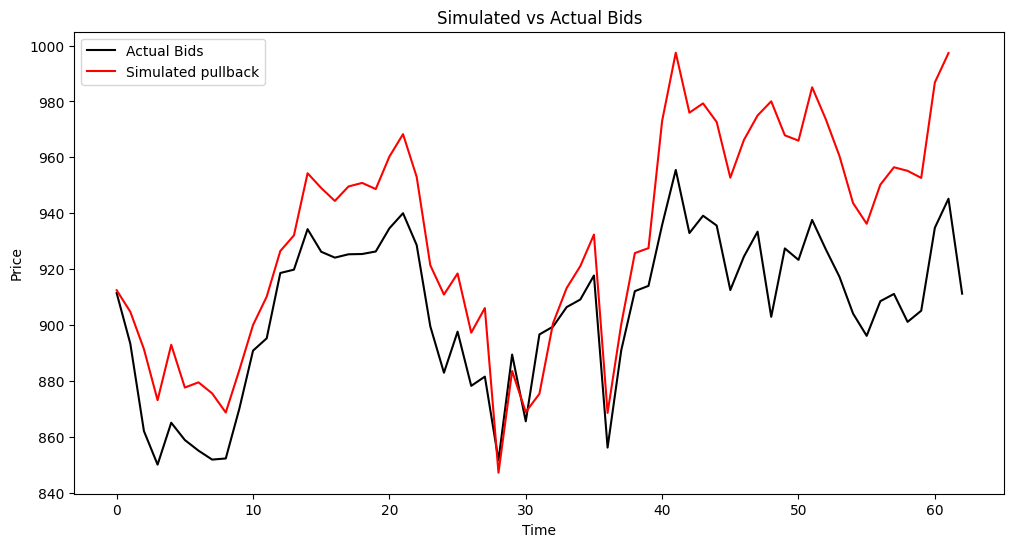

In [57]:
#plot the backtest against actual bids
plt.figure(figsize=(12, 6))
plt.plot(actual_bids, color='black', label='Actual Bids')
plt.plot(backtest, color='red', label='Simulated pullback')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Simulated vs Actual Bids')
plt.legend()
plt.show()


# Things to ask:


### 1. Payout at every end of quarter?
### 2. If redeem, do we still get coupon for the quarter? Also when check for early redemption? (Start/ end of quarter?)
### 3. Early redemption, month 6 counted?
### 4. Confirm usage of conversion ratio
### 5. Which interest rate we going to use?
### 6. mu -  sigma^2/2 ( R? )
### 7. Simulate path by discounting at every time step
### 8. Early redemption on Sunday, use Friday or monay date instead?
### 9. What if coupon reddemption same as autocall redemption date but after autocall trigger date?




In [103]:
start_date_backtest = datetime.date(2024,8,1)
end_date_backtest = datetime.date(2024,10,28)
#backtest_dates = date_range_list(start_date_backtest, end_date_backtest)
#backtest_dates1 = pd.bdate_range(start=start_date_backtest, end= end_date_backtest)
#assert len(backtest_dates) == len(backtest_dates1)

history_start = datetime.date(2022,9,30)
history_end = datetime.date(2024,10,28)


# Specify the ticker for BMW (BMW.DE for Frankfurt Stock Exchange)
BMW_ticker = 'BMW.DE'
MBG_ticker = 'MBG.DE'
P_ticket = 'P911.DE'

# Download historical data for BMW
bmw_data = yf.download(BMW_ticker, start=history_start, end=history_end)
mbg_data = yf.download(MBG_ticker, start=history_start, end=history_end)
p_data = yf.download(P_ticket, start=history_start, end=history_end)
history_dates = [ i.date()for i in p_data.index]

BMP = pd.concat([bmw_data['Close'], mbg_data['Close'], p_data['Close']], axis=1)
dt = 1/252
bmp_prices = BMP.values.astype(float)  # Extract columns 

n0 = bmp_prices.shape[0]
bmplogprices = np.log(bmp_prices)
bmplogreturns = bmplogprices[1:n0, :] - bmplogprices[0:n0-1, :]
#print(bmplogreturns.shape)
#start_to_sim = np.busday_count(history_start, start_date_backtest)
#print(start_to_sim)

# get list of subset of history dates where the date is greater than or equal to start_date_backtest and less than or equal to end_date_backtest
backtest_dates = [i for i in history_dates if i >= start_date_backtest and i <= end_date_backtest]
#print(len(backtest_dates),backtest_dates[0], backtest_dates[-1])

start_to_sim_dates = [i for i in history_dates if i >= history_start and i < start_date_backtest]
#print(start_to_sim_dates[0], start_to_sim_dates[-1])

start_to_sim = len(start_to_sim_dates)


Nsim = 10000

early_redemption_dates = [datetime.date(2024,3,5), datetime.date(2024,6,5), datetime.date(2024,9,4)]
coupon_payments = [datetime.date(2023,12,8), datetime.date(2024,3,8), datetime.date(2024,6,10), datetime.date(2024,9,9), datetime.date(2024,12,9)]  
barrier_levels = [56.520, 39.516, 58.896]
early_redemption_level = [94.2, 65.86, 98.16]

sim_end = datetime.date(2024,12,4)
sim_dates = [i for i in history_dates if i >= start_date_backtest and i <= end_date_backtest]
extra = date_range_list(end_date_backtest, sim_end)
sim_dates.extend(extra)
m = len(sim_dates)
#print('m',m)
backtest = []
backtestplush = []
backtestminush = []

for i in range(len(backtest_dates)):
    
    bmplog_window = bmplogreturns[:start_to_sim+i,:]
    r = 0.03254654
    var = np.var(bmplog_window, axis=0) / dt
    v = np.array([r,r,r]) - 0.5 * var
    Sigma = np.cov(bmplog_window.T) / dt

    # Initialize matrices to store simulated paths
    S1 = np.zeros((Nsim, m + 1))
    S2 = np.zeros((Nsim, m + 1))
    S3 = np.zeros((Nsim, m + 1))

    S1plush = np.zeros((Nsim, m + 1))
    S2plush = np.zeros((Nsim, m + 1))
    S3plush = np.zeros((Nsim, m + 1))

    S1minush = np.zeros((Nsim, m + 1))
    S2minush = np.zeros((Nsim, m + 1))
    S3minush = np.zeros((Nsim, m + 1))


    S0 = bmp_prices[start_to_sim+i, :]  # Last observed prices
    h = S0*0.00001

    #print(S0+ h)

    for j in range(Nsim):
        S, Splush, Sminush = SimGBM1shootpmhn(S0, v, Sigma, dt, h)
        S1[j, :] = S[0, :]
        S2[j, :] = S[1, :]
        S3[j, :] = S[2, :]

        S1plush[j, :] = Splush[0, :]
        S2plush[j, :] = Splush[1, :]
        S3plush[j, :] = Splush[2, :]

        S1minush[j, :] = Sminush[0, :]
        S2minush[j, :] = Sminush[1, :]
        S3minush[j, :] = Sminush[2, :]

    
    all_S = np.stack((S1, S2, S3), axis=0)
    all_S = np.transpose(all_S,(1,0,2))

    all_Splush = np.stack((S1plush, S2plush, S3plush), axis=0)
    all_Splush = np.transpose(all_Splush,(1,0,2))

    all_Sminush = np.stack((S1minush, S2minush, S3minush), axis=0)
    all_Sminush = np.transpose(all_Sminush,(1,0,2))

    
    current_date = backtest_dates[i]
    n_total_coupons = 2 if current_date <= coupon_payments[3] else 1
    early_coupons = 1 if current_date <= coupon_payments[3] else 0

    payoffs, cases = calculate_payoff(all_S, early_redemption_dates, barrier_levels, D=1000, c=0.1025/4, n_total_coupons=n_total_coupons, early_coupons=early_coupons)
    
    payoffsplush, casesplush = calculate_payoff(all_Splush, early_redemption_dates, barrier_levels, D=1000, c=0.1025/4, n_total_coupons=n_total_coupons, early_coupons=early_coupons)

    payoffsminush, casesminush = calculate_payoff(all_Sminush, early_redemption_dates, barrier_levels, D=1000, c=0.1025/4, n_total_coupons=n_total_coupons, early_coupons=early_coupons)

    SimNotes = np.exp(-r*m/252)*np.array(np.mean(payoffs))
    SimNotesplush = np.exp(-r*m/252)*np.array(np.mean(payoffsplush))
    SimNotesminush = np.exp(-r*m/252)*np.array(np.mean(payoffsminush))
                                               
    m-=1
    backtest.append(SimNotes)
    backtestplush.append(SimNotesplush)
    backtestminush.append(SimNotesminush)

    
#len(backtest)   
#backtest 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [112]:
S0 = bmp_prices[start_to_sim, :]  # Last observed prices
S0*0.00001


array([0.000832 , 0.0005943, 0.0006886])

In [104]:
note = np.array(backtest)[-1]
noteplush = np.array(backtestplush)[-1]
noteminush = np.array(backtestminush)[-1]
print('note:', note, 'noteplush:', noteplush, 'noteminush:', noteminush, 'h:', h)
notedelta = (noteplush - noteminush)/(2*h)
print('notedelta:', notedelta)
notegamma = (noteplush - 2*note + noteminush)/(h**2)
print('note gamma:', notegamma)

note: 996.3739465422136 noteplush: 996.3743309931823 noteminush: 996.3735620912448 h: [0.00076   0.0005779 0.0007028]
notedelta: [0.50585654 0.66525517 0.54702757]
note gamma: [-1.96826243e-07 -3.40411939e-07 -2.30168928e-07]


In [109]:
print(backtest[-6])
print(backtestplush[-6])
print(backtestminush[-6])

949.6988413398592
949.8222931662881
949.6976696337083


In [105]:
note = np.array(backtest)
noteplush = np.array(backtestplush)
noteminush = np.array(backtestminush)
#print('note:', note, 'noteplush:', noteplush, 'noteminush:', noteminush, 'h:', h)
deltas = []
for i in range(len(note)):
    notedelta = (noteplush[i] - noteminush[i])/(2*h)
    deltas.append(notedelta)

print('notedelta:', deltas)
#notegamma = (noteplush - 2*note + noteminush)/(h**2)
#print('note gamma:', notegamma)

notedelta: [array([23.54473385, 30.96383015, 25.4610103 ]), array([2.85335633, 3.75246717, 3.08558743]), array([18.28819414, 24.05092114, 19.77664739]), array([3.6277224 , 4.77084095, 3.92297819]), array([3.21982155, 4.23440793, 3.4818788 ]), array([3.49977686, 4.60257894, 3.78461932]), array([19.84123203, 26.0933312 , 21.45608509]), array([3.49860656, 4.60103987, 3.78335377]), array([32.02092603, 42.11092473, 34.62706916]), array([25.50093026, 33.53643656, 27.57641908]), array([27.39081385, 36.02183457, 29.62011794]), array([2.95272521, 3.88314781, 3.19304382]), array([ 77.4942392 , 101.91316986,  83.80139843]), array([2.42627085, 3.19080432, 2.623742  ]), array([1.85626014, 2.44117958, 2.00733883]), array([1.93478136, 2.54444335, 2.0922508 ]), array([28.49260707, 37.47080988, 30.81158473]), array([2.12615017, 2.7961137 , 2.29919488]), array([20.57956332, 27.06431541, 22.25450825]), array([2.02376799, 2.66147023, 2.18847994]), array([1.71668719, 2.25762631, 1.85640621]), array([29.037

In [114]:
bmw_data = yf.download(BMW_ticker, start=start_date_backtest,  end=end_date_backtest)
prices = bmw_data['Close']
price_values = np.squeeze(prices.values)
hedged = []
for i in range(len(backtest)):
    hedged.append((backtest[i] - deltas[i][0]*price_values[i]))

#hedged

[*********************100%***********************]  1 of 1 completed

In [115]:
new = []
for i in hedged:
    new.append(i.item())
#new


In [117]:
deltas

[array([23.54473385, 30.96383015, 25.4610103 ]),
 array([2.85335633, 3.75246717, 3.08558743]),
 array([18.28819414, 24.05092114, 19.77664739]),
 array([3.6277224 , 4.77084095, 3.92297819]),
 array([3.21982155, 4.23440793, 3.4818788 ]),
 array([3.49977686, 4.60257894, 3.78461932]),
 array([19.84123203, 26.0933312 , 21.45608509]),
 array([3.49860656, 4.60103987, 3.78335377]),
 array([32.02092603, 42.11092473, 34.62706916]),
 array([25.50093026, 33.53643656, 27.57641908]),
 array([27.39081385, 36.02183457, 29.62011794]),
 array([2.95272521, 3.88314781, 3.19304382]),
 array([ 77.4942392 , 101.91316986,  83.80139843]),
 array([2.42627085, 3.19080432, 2.623742  ]),
 array([1.85626014, 2.44117958, 2.00733883]),
 array([1.93478136, 2.54444335, 2.0922508 ]),
 array([28.49260707, 37.47080988, 30.81158473]),
 array([2.12615017, 2.7961137 , 2.29919488]),
 array([20.57956332, 27.06431541, 22.25450825]),
 array([2.02376799, 2.66147023, 2.18847994]),
 array([1.71668719, 2.25762631, 1.85640621]),
 arr

In [118]:
price_values

array([83.19999695, 82.05999756, 79.81999969, 79.54000092, 80.40000153,
       79.81999969, 79.69999695, 78.98000336, 79.31999969, 80.04000092,
       81.48000336, 81.73999786, 82.72000122, 82.66000366, 83.55999756,
       83.22000122, 84.45999908, 84.80000305, 84.77999878, 83.54000092,
       83.86000061, 83.81999969, 83.13999939, 81.55999756, 80.54000092,
       80.30000305, 78.19999695, 77.63999939, 68.98000336, 71.08000183,
       71.36000061, 73.31999969, 72.51999664, 72.91999817, 74.51999664,
       76.13999939, 73.63999939, 75.44000244, 78.12000275, 75.66000366,
       78.54000092, 81.13999939, 79.18000031, 77.73999786, 77.62000275,
       76.41999817, 77.76000214, 77.83999634, 76.26000214, 77.19999695,
       76.63999939, 75.77999878, 76.23999786, 75.27999878, 74.73999786,
       74.76000214, 75.09999847, 74.87999725, 75.22000122, 75.55999756,
       76.48000336, 76.        ])

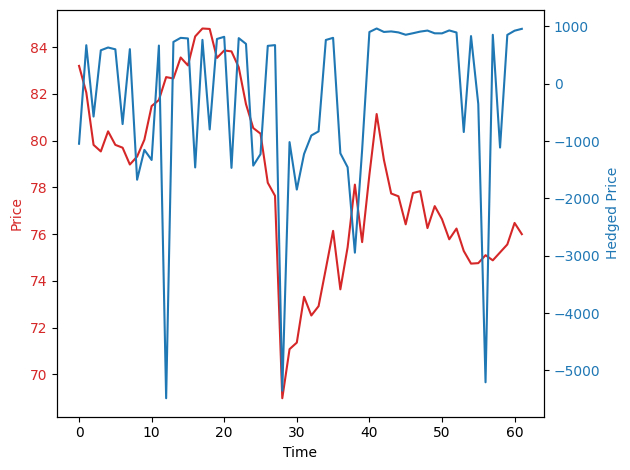

In [125]:
#plot actual bids and price values on the same graph but with different y axes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color=color)
ax1.plot(price_values, color=color, label='Price')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Hedged Price', color=color)  # we already handled the x-label with ax1
ax2.plot(new, color=color, label='Hedged Price')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
    

In [71]:
gammas = []
for i in range(len(note)):
    notegamma = (noteplush[i] - 2*note[i] + noteminush[i])/(h**2)
    gammas.append(notegamma)

print('note gamma:', gammas)

note gamma: [array([0., 0., 0.]), array([1.96826243e-07, 3.40411939e-07, 2.30168928e-07]), array([1.96826243e-07, 3.40411939e-07, 2.30168928e-07]), array([3.93652485e-07, 6.80823879e-07, 4.60337857e-07]), array([3.93652485e-07, 6.80823879e-07, 4.60337857e-07]), array([3.93652485e-07, 6.80823879e-07, 4.60337857e-07]), array([-3.93652485e-07, -6.80823879e-07, -4.60337857e-07]), array([5.90478728e-07, 1.02123582e-06, 6.90506785e-07]), array([-3.93652485e-07, -6.80823879e-07, -4.60337857e-07]), array([0., 0., 0.]), array([-3.93652485e-07, -6.80823879e-07, -4.60337857e-07]), array([0., 0., 0.]), array([0., 0., 0.]), array([-5.90478728e-07, -1.02123582e-06, -6.90506785e-07]), array([3.93652485e-07, 6.80823879e-07, 4.60337857e-07]), array([-3.93652485e-07, -6.80823879e-07, -4.60337857e-07]), array([-1.96826243e-07, -3.40411939e-07, -2.30168928e-07]), array([1.96826243e-07, 3.40411939e-07, 2.30168928e-07]), array([1.96826243e-07, 3.40411939e-07, 2.30168928e-07]), array([1.96826243e-07, 3.40411

In [48]:
def payoff_JUSTIN(sim_prices, initial=1000, barrier=0.6, coupon_rate=0.1025, T=1/4, dt=1/252):
    # num_stocks, m = sim_prices.shape
    # T = m - 1
    m = int( T / dt)
    initial_prices = np.array(early_redemption_level)
    final_prices = sim_prices[:, -1]
    barrier_prices = 0.6 * initial_prices
    conv_ratio = initial / initial_prices

    early_redeemed = False
    barrier_breach = False
    case = 0
    worst_stock = 0

    initial_fix = '2023-09-01'
    sim_start_date = '2024-07-01'
    er_date1 = '2024-03-05'
    er_date2 = '2024-06-05'
    er_date3 = '2024-09-04'

    # Number of trading days from product start date to early redemption obs date
    days_till_sim =  len(pd.bdate_range(start=initial_fix, end=sim_start_date))

    # Number of trading days to early redemption obs date
    days_to_er1 = len(pd.bdate_range(start=sim_start_date, end=er_date1))
    days_to_er2 = len(pd.bdate_range(start=sim_start_date, end=er_date2))
    days_to_er3 = len(pd.bdate_range(start=sim_start_date, end=er_date3))
    days = [days_to_er1, days_to_er2, days_to_er3]
    #print(days)
    er_obs_days = [num_days for num_days in days if num_days > 0]

    # Early redemption (case 1)
    for t in er_obs_days:
        if t ==0:
            break
        elif np.all(sim_prices[:, t] >= initial_prices):
            total_days = days_till_sim + t
            num_quarters = np.floor(total_days / (252/4))
            note_payoff = initial + initial * coupon_rate/4 * num_quarters
            early_redeemed = True
            case = 1
            return note_payoff, case
    
    # total duration from historical to sim end date
    total_days = days_till_sim + m
    num_quarters = np.floor(total_days / (252/4))

    # Reference share drop to 0 (case 4)
    if np.any(sim_prices <= 0):
        # note_payoff = initial * coupon_rate * term/12
        note_payoff = initial * coupon_rate/4 * num_quarters
        case = 4


    # Barrier not breached (case 2)
    if not np.any(sim_prices <= (barrier * initial_prices[:, None])):
        # note_payoff = initial + initial * coupon_rate * term/12
        note_payoff = initial + initial * coupon_rate/4 * num_quarters
        case = 2

    # Barrier breached but prices closed above initial prices at T (case 2)
    elif np.all(final_prices >= initial_prices):
        note_payoff = initial + initial * coupon_rate/4 * num_quarters
        case = 2

    # Barrier breached and at least one stock closed below initial level (case 3)
    else:
        worst_stock = np.argmin((final_prices - initial_prices) / initial_prices)
        worst_final_price = final_prices[worst_stock]
        note_payoff = worst_final_price * conv_ratio[worst_stock] + initial * coupon_rate/4 * num_quarters 
        barrier_breach = True
        # print(worst_final_price)
        case = 3

    return note_payoff, case

In [49]:
P = []
C = []
for i in range(all_S.shape[0]):

    pa, case = payoff_JUSTIN(all_S[i])
    P.append(pa)
    C.append(case)
#print(P)

IndexError: index 48 is out of bounds for axis 1 with size 30

In [2005]:
print(' number of case 1:', C.count(1),'\n','number of case 2:', C.count(2),'\n', 'number of case 3:', C.count(3), '\n', 'number of case 4:', C.count(4))

 number of case 1: 0 
 number of case 2: 0 
 number of case 3: 0 
 number of case 4: 0
